In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pathlib
import random
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
#get the data
dir_path='../../Data/pizza_steak/'
for dirpath, dirnames, filenames in os.walk(f'{dir_path}'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in ../../Data/pizza_steak/
There are 2 directories and 0 images in ../../Data/pizza_steak/test
There are 0 directories and 250 images in ../../Data/pizza_steak/test\pizza
There are 0 directories and 250 images in ../../Data/pizza_steak/test\steak
There are 2 directories and 0 images in ../../Data/pizza_steak/train
There are 0 directories and 750 images in ../../Data/pizza_steak/train\pizza
There are 0 directories and 750 images in ../../Data/pizza_steak/train\steak


In [45]:
data_dir=pathlib.Path(f'{dir_path}/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [46]:
#lets visualize our images
def view_random_image(target_dir, target_class):
    target_folder=target_dir+target_class
    random_img=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+'/'+random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (461, 512, 3)


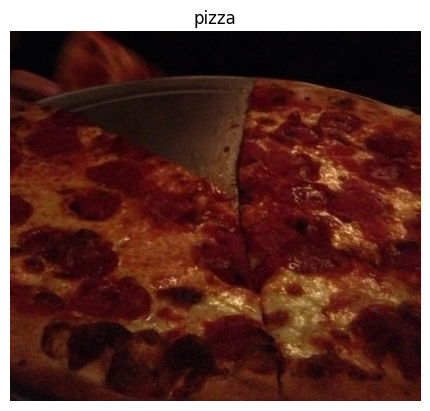

In [47]:
img=view_random_image(f'{dir_path}/train/','pizza')

In [48]:
img=tf.constant(img)
img

<tf.Tensor: shape=(461, 512, 3), dtype=uint8, numpy=
array([[[14,  7,  1],
        [17, 10,  4],
        [18, 11,  5],
        ...,
        [ 8,  3,  7],
        [ 8,  3,  7],
        [ 7,  2,  6]],

       [[14,  7,  1],
        [16,  9,  3],
        [17, 10,  4],
        ...,
        [ 8,  3,  7],
        [ 8,  3,  7],
        [ 7,  2,  6]],

       [[14,  7,  1],
        [16,  9,  3],
        [17,  9,  6],
        ...,
        [ 7,  2,  6],
        [ 8,  3,  7],
        [ 8,  3,  7]],

       ...,

       [[19,  9, 10],
        [22, 12, 13],
        [21, 11, 12],
        ...,
        [82, 29, 25],
        [79, 26, 20],
        [70, 17, 11]],

       [[20, 10, 11],
        [23, 13, 14],
        [21, 11, 12],
        ...,
        [78, 25, 21],
        [78, 25, 19],
        [70, 17, 11]],

       [[19,  9, 10],
        [22, 12, 13],
        [19,  9, 10],
        ...,
        [73, 23, 16],
        [75, 25, 18],
        [69, 19, 12]]], dtype=uint8)>

In [49]:
#preprocess the data
tf.random.set_seed(100)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir_path=dir_path+"/train"
test_dir_path=dir_path+"/test"
train_data=train_datagen.flow_from_directory(train_dir_path, batch_size=32, target_size=(224,224), class_mode='binary', seed=100)
valid_data=valid_datagen.flow_from_directory(test_dir_path,batch_size=32,target_size=(224,224), class_mode='binary', seed=100)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [50]:
#build the model
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [54]:
#compiling the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
               metrics=['accuracy'])
history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 362s 8s/step - loss: 0.5182 - accuracy: 0.7547 - val_loss: 0.4047 - val_accuracy: 0.8340
Epoch 2/5
11/47 [======>.......................] - ETA: 4:23 - loss: 0.3906 - accuracy: 0.8362